# **Regresión Lineal.**



Para nuestro modelo de regresión, vamos a usar los datos que publica Properati aquí --> https://www.properati.com.ar/data/. El dataset contiene características de propiedades reales publicados en ese portal inmobiliario. El mismo ha sido acondicionado previamente usado en este curso de Data Science (en ese caso con R, dictado por Diego Kozlowzki y Natsumi Shokida). Si quieren más info ver --> https://github.com/DiegoKoz/intro_ds

### **Importamos las librerías y cargamos los datos.**

In [ ]:
# Vamos a importar pandas (que ya utilizamos en clases anteriores), numpy y matplot lib
# Y también scikit-learn, la principal librería para realizar Machine Learning en Python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Variable string que vamos a utilizar como argumento a la hora de extraer nuestro dataset. 

properati = "https://raw.githubusercontent.com/RacoFernandez/python-ciencias-sociales/main/clase-vi/properati-data.csv"

Ahora procedemos a leer la tabla con el método *read_csv()*.

In [ ]:
# Como en la clase anterior, vamos a trabajar con un csv, en este caso posteado en github, indicamos que el separador es una coma y el encoding UTF-8
data = pd.read_csv(properati, sep=",", encoding='utf-8')

### **Primer vistazo a la** *data*.

In [ ]:
#Vamos a ver los datos imprimiendo el objeto
data

,id,l3,rooms,bathrooms,surface_total,surface_covered,price,property_type
0,AfdcsqUSelai1ofCAq2B0Q==,Velez Sarsfield,3,2,95,69,199900.0,Casa
1,ESzybdH7YU2uIU1/kHtRGw==,Nuñez,1,1,44,38,147000.0,Departamento
2,r22OfzZ3kXooSPoE5HMuZQ==,Almagro,1,1,40,37,92294.0,Departamento
3,atZQXVtyfG7+OiX6gYY3lA==,Almagro,1,1,49,44,115000.0,Departamento
4,R7IsTtVsxPCiRbIHMaWGxA==,Almagro,1,1,40,37,77000.0,Departamento
...,...,...,...,...,...,...,...,...
45899,07P8ihq/MYOLQGX9L4clQw==,Villa Ortuzar,5,2,162,120,305000.0,Casa
45900,MCDEJ9pLEyepgNpnXEF1Aw==,Palermo,5,4,212,212,580000.0,Departamento
45901,vuwPuTFbbXNHhdM4XAt4/Q==,Belgrano,7,4,222,222,810000.0,Departamento
45902,86qwdY2KcAj8T00e1jdk2A==,Barrio Norte,6,3,112,112,230000.0,Departamento


In [ ]:
# Vemos la cantidad de filas y columnas que tienen nuestros datos
print("La base tiene",data.shape[0],"filas")
print("La base tiene",data.shape[1],"columnas")

La base tiene 45904 filas
La base tiene 8 columnas


In [ ]:
#Selecciono todo el dataset menos la primera columna (con índice 0, corresponde al ID)
data=data.iloc[:,1:data.shape[1]]
data

,l3,rooms,bathrooms,surface_total,surface_covered,price,property_type
0,Velez Sarsfield,3,2,95,69,199900.0,Casa
1,Nuñez,1,1,44,38,147000.0,Departamento
2,Almagro,1,1,40,37,92294.0,Departamento
3,Almagro,1,1,49,44,115000.0,Departamento
4,Almagro,1,1,40,37,77000.0,Departamento
...,...,...,...,...,...,...,...
45899,Villa Ortuzar,5,2,162,120,305000.0,Casa
45900,Palermo,5,4,212,212,580000.0,Departamento
45901,Belgrano,7,4,222,222,810000.0,Departamento
45902,Barrio Norte,6,3,112,112,230000.0,Departamento


In [ ]:
#Confirmo que no haya valores nulos en mi dataset, una de las condiciones de la regresión lineal
data.isnull().values.any()

False

In [ ]:
#Ya que la regresión no soporta valores no-numéricos, tengo que crear variables dummies,
#o lo que se denomina one-hot-encoding
data=pd.get_dummies(data)
data

,rooms,bathrooms,surface_total,surface_covered,price,l3_Abasto,l3_Agronomía,l3_Almagro,l3_Balvanera,l3_Barracas,l3_Barrio Norte,l3_Belgrano,l3_Boca,l3_Boedo,l3_Caballito,l3_Catalinas,l3_Centro / Microcentro,l3_Chacarita,l3_Coghlan,l3_Colegiales,l3_Congreso,l3_Constitución,l3_Flores,l3_Floresta,l3_Las Cañitas,l3_Liniers,l3_Mataderos,l3_Monserrat,l3_Monte Castro,l3_Nuñez,l3_Once,l3_Palermo,l3_Parque Avellaneda,l3_Parque Centenario,l3_Parque Chacabuco,l3_Parque Chas,l3_Parque Patricios,l3_Paternal,l3_Pompeya,l3_Puerto Madero,l3_Recoleta,l3_Retiro,l3_Saavedra,l3_San Cristobal,l3_San Nicolás,l3_San Telmo,l3_Tribunales,l3_Velez Sarsfield,l3_Versalles,l3_Villa Crespo,l3_Villa Devoto,l3_Villa General Mitre,l3_Villa Lugano,l3_Villa Luro,l3_Villa Ortuzar,l3_Villa Pueyrredón,l3_Villa Real,l3_Villa Riachuelo,l3_Villa Santa Rita,l3_Villa Soldati,l3_Villa Urquiza,l3_Villa del Parque,property_type_Casa,property_type_Departamento,property_type_PH
0,3,2,95,69,199900.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,1,44,38,147000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,1,40,37,92294.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,1,49,44,115000.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,1,40,37,77000.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45899,5,2,162,120,305000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
45900,5,4,212,212,580000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
45901,7,4,222,222,810000.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
45902,6,3,112,112,230000.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


### **Separamos nuestro dataset entre conjuntos de entrenamiento y testeo.**

1.   Generamos unas X (variables predictoras) y una Y (variable dependiente o a predecir)
2.   Hacemos una separación entre train y test para cada una (mismas filas)



In [ ]:
#1.
#Nuestra "Y" va a ser el precio de la propiedad
properati_Y = pd.DataFrame(data['price'])
#Genero un dataset con mis variables predictoras
properati_X=pd.DataFrame(data.drop('price', axis=1))

In [ ]:
#2.
#Separo entre entrenamiento y test tanto mis X como mi Y
properati_x_train, properati_x_test, properati_y_train, properati_y_test = train_test_split(
    properati_X, properati_Y, test_size=0.3, random_state=42)

In [ ]:
#Vemos que entre train y test se mantuvo una proporcion de 70-30
print("properati_x_train tiene",properati_x_train.shape[0],"filas")
print("properati_x_train tiene",properati_x_train.shape[1],"columnas")
print("properati_x_test tiene",properati_x_test.shape[0],"filas")
print("properati_x_test tiene",properati_x_test.shape[1],"columnas")
print("properati_y_train tiene",properati_y_train.shape[0],"filas")
print("properati_y_train tiene",properati_y_train.shape[1],"columnas")
print("properati_y_test tiene",properati_y_test.shape[0],"filas")
print("properati_y_test tiene",properati_y_test.shape[1],"columnas")

properati_x_train tiene 32132 filas
properati_x_train tiene 64 columnas
properati_x_test tiene 13772 filas
properati_x_test tiene 64 columnas
properati_y_train tiene 32132 filas
properati_y_train tiene 1 columnas
properati_y_test tiene 13772 filas
properati_y_test tiene 1 columnas


### **Cargo el modelo a utilizar y lo entreno.**


In [ ]:
#Cargamos el modelo de regresión lineal que nos brinda scikit-learn
regr = linear_model.LinearRegression()

In [ ]:
#Entreno el modelo, tengo que pasar mis datos de entrenamiento X e Y
regr.fit(properati_x_train, properati_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Consulto ordenada al origen del modelo
print('Ordenada al origen / Intercept: \n', regr.intercept_)
#Veo los coeficientes de mis variables
print('Coeficientes: \n', regr.coef_)

Ordenada al origen / Intercept: 
 [-68007.01896088]
Coeficientes: 
 [[-3.62118260e+03  3.41318323e+04  9.17137762e+02  1.45684924e+03
   4.37639363e+03  5.84277277e+03 -6.28303773e+02 -2.15342269e+04
  -3.61902371e+03  5.58633883e+04  7.31862056e+04 -4.13384487e+04
  -1.53054859e+04  9.27893703e+03 -5.88228808e+04 -2.35398414e+04
   1.70806332e+04  4.12426545e+04  3.69442799e+04 -2.97681842e+04
  -4.24121421e+04 -1.95511303e+04 -2.57331200e+04  9.59962085e+04
  -1.49366797e+04 -3.26536138e+04 -2.96941909e+04 -5.18387193e+03
   6.12745561e+04 -2.39271519e+04  7.13613338e+04 -2.89417181e+04
  -9.68114218e+03 -1.53392060e+04  9.64099359e+03 -3.02781921e+04
  -1.13649224e+04 -7.49418777e+04  2.64746014e+05  6.71029185e+04
   2.27191670e+04  2.28068675e+04 -1.94957289e+04 -2.40663661e+04
  -2.55229317e+03 -3.72413499e+04 -2.67783424e+04 -1.78121346e+04
   5.11196568e+03  1.76709235e+04 -1.77189147e+04 -8.21850021e+04
  -4.40848813e+03  2.30932042e+04  1.52269179e+04 -8.29060082e+03
  -3.928

In [ ]:
#Genero las predicciones para el test de y, para luego poder compararlas con los valores reales de y
properati_y_pred = regr.predict(properati_x_test)

In [ ]:
#Calculo el coeficiente de determinación, 1 indica una predicción perfecta
print('Coefficient of determination: %.2f'
      % r2_score(properati_y_test, properati_y_pred))

Coefficient of determination: 0.77


In [ ]:
#Calculamos el error cuadrático medio
print('Error Cuadrático Medio: %.2f'
      % mean_squared_error(properati_y_test, properati_y_pred))

Error Cuadrático Medio: 4386655321.95


### **Regresión Lineal Simple.**

In [ ]:
properati_x_train_2=pd.DataFrame(properati_x_train['surface_total'])
properati_x_test_2=pd.DataFrame(properati_x_test['surface_total'])
properati_y_train_2=properati_y_train
properati_y_test_2=properati_y_test

In [ ]:
regrsimp = linear_model.LinearRegression()

In [ ]:
regrsimp.fit(properati_x_train_2, properati_y_train_2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
properati_y_pred_2 = regrsimp.predict(properati_x_test_2)

In [ ]:
#Calculo el coeficiente de determinación para mi regresión lineal simple
r_sq = regrsimp.score(properati_y_test_2, properati_y_pred_2)
print('Coeficiente de determinación:', r_sq)

Coeficiente de determinación: -29573728.089250732


In [ ]:
#Calculamos el error cuadrático medio para mi regresión lineal simple
print('Error Cuadrático Medio: %.2f'
      % mean_squared_error(properati_y_test_2, properati_y_pred_2))

Error Cuadrático Medio: 8165995160.49


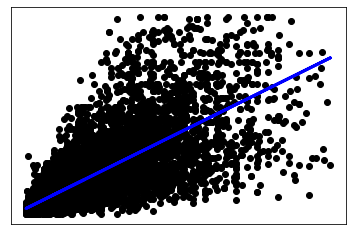

In [ ]:
plt.scatter(properati_x_test_2, properati_y_test_2,  color='black')
plt.plot(properati_x_test_2, properati_y_pred_2, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()